Car Price Prediction

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn 
import pickle

In [129]:
df=pd.read_csv('data_car_price_predicton.csv')

In [130]:
df.head()

,Unnamed: 0,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [131]:
df.columns

Index(['Unnamed: 0', 'car_ID', 'symboling', 'CarName', 'fueltype',
       'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [132]:
df=df.drop(['Unnamed: 0','car_ID'],axis=1)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [134]:
print(df['fueltype'].unique())
print(df['aspiration'].unique())
print(df['doornumber'].unique())
print(df['carbody'].unique())
print(df['drivewheel'].unique())
print(df['enginelocation'].unique())
print(df['enginetype'].unique())
print(df['fuelsystem'].unique())
print(df['cylindernumber'].unique())
print(df['doornumber'].unique())

['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['two' 'four']


In [135]:
cno={'four':4, 'six':6, 'five':5 ,'three':3 ,'twelve':12, 'two':2 ,'eight':8}
df['doornumber']=df['doornumber'].map(cno)
df['cylindernumber']=df['cylindernumber'].map(cno)

In [136]:
pd.set_option('display.max_columns',None)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


categorical convertion

In [137]:
dfcategories=df.select_dtypes('object')
dfnum=df.select_dtypes(['int64','float64'])
dfcategories.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi


In [138]:
dfnum.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [139]:
dfcategories['enginetype'].value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [140]:
engine={'dohc':1 ,'ohcv':2 ,'ohc':3 ,'l':4, 'rotor':5 ,'ohcf':6, 'dohcv':7}
dfcategories['enginetype']=dfcategories['enginetype'].map(engine)
dfcategories['enginetype'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [141]:
dfcategories['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [142]:
fuel={'mpfi':1, '2bbl':2, 'mfi':3, '1bbl':4, 'spfi':5 ,'4bbl':6, 'idi':7, 'spdi':8}
dfcategories['fuelsystem']=dfcategories['fuelsystem'].map(fuel)
dfcategories['fuelsystem'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [144]:
dfcategories['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [145]:
dfcategories['carcompany']=dfcategories['CarName'].apply(lambda x : x.split(" ")[0])
dfcategories['carcompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [146]:
carcom={'maxda':'mazda','Nissan': 'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen': 'volkswagen','vw':'volkswagen'}
dfcategories['carcompany']=dfcategories['carcompany'].replace(carcom)
dfcategories['carcompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [147]:
def get_country(car_brand):
    car_brands_by_country = {
        'Italian': ['alfa-romero'],
        'German': ['audi', 'bmw', 'volkswagen','porsche'],
        'American': ['chevrolet', 'dodge', 'buick', 'mercury', 'plymouth'],
        'Japanese': ['honda', 'isuzu', 'mazda', 'mitsubishi', 'nissan', 'subaru', 'toyota'],
        'British': ['jaguar'],
        'French': ['peugeot', 'renault'],
        'Swedish': ['saab', 'volvo']
    }
    
    for country, brands in car_brands_by_country.items():
        if car_brand in brands:
            return country
    
    return 'Unknown'
dfcategories['country']=dfcategories['carcompany'].map(get_country)

In [148]:
dfcategories['country'].unique()

array(['Italian', 'German', 'American', 'Japanese', 'British', 'French',
       'Swedish'], dtype=object)

In [149]:
dfcategories.drop(['CarName','carcompany'],axis=1,inplace=True)
dfcategories.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,country
0,gas,std,convertible,rwd,front,1,1,Italian
1,gas,std,convertible,rwd,front,1,1,Italian
2,gas,std,hatchback,rwd,front,2,1,Italian
3,gas,std,sedan,fwd,front,3,1,German
4,gas,std,sedan,4wd,front,3,1,German


In [150]:
dfcategories['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [151]:
carb={'convertible':1, 'hatchback':2, 'sedan':3, 'wagon':4, 'hardtop':5}
coun={'Italian':1, 'German':2, 'American':3, 'Japanese':4, 'British':5, 'French':6,
       'Swedish':7}
dfcategories['country']=dfcategories['country'].map(coun)
dfcategories['carbody']=dfcategories['carbody'].map(carb)
dfcategories.head()


,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,country
0,gas,std,1,rwd,front,1,1,1
1,gas,std,1,rwd,front,1,1,1
2,gas,std,2,rwd,front,2,1,1
3,gas,std,3,fwd,front,3,1,2
4,gas,std,3,4wd,front,3,1,2


In [152]:
dfcategories=pd.get_dummies(dfcategories,columns=['fueltype','aspiration','drivewheel'	,'enginelocation'],drop_first=True,dtype=int)
dfcategories.head()

,carbody,enginetype,fuelsystem,country,fueltype_gas,aspiration_turbo,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
0,1,1,1,1,1,0,0,1,0
1,1,1,1,1,1,0,0,1,0
2,2,2,1,1,1,0,0,1,0
3,3,3,1,2,1,0,1,0,0
4,3,3,1,2,1,0,0,0,0


In [153]:
dfnum.corr()


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
doornumber,-0.664073,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,-0.531954,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.113129,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.105790,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.119258,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173


<Axes: >

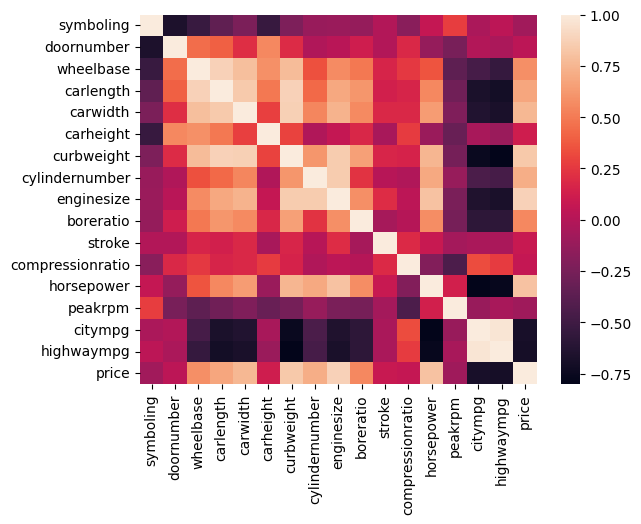

In [154]:
sn.heatmap(dfnum.corr())

Feature selection

In [155]:
import numpy as np
yn=dfnum['price']
yn=np.array(yn)
xn=dfnum.drop(['price','symboling'],axis=1)


In [156]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xn, yn)
fimp=pd.Series(rf.feature_importances_,index=xn.columns)
fimp.nlargest(17)


enginesize          0.660389
curbweight          0.186516
highwaympg          0.046162
horsepower          0.019775
carwidth            0.015281
wheelbase           0.014574
cylindernumber      0.009182
citympg             0.009172
carlength           0.008941
compressionratio    0.008622
peakrpm             0.006521
carheight           0.005388
stroke              0.004919
boreratio           0.003727
doornumber          0.000830
dtype: float64

feature importance by random forest regressor

<Axes: >

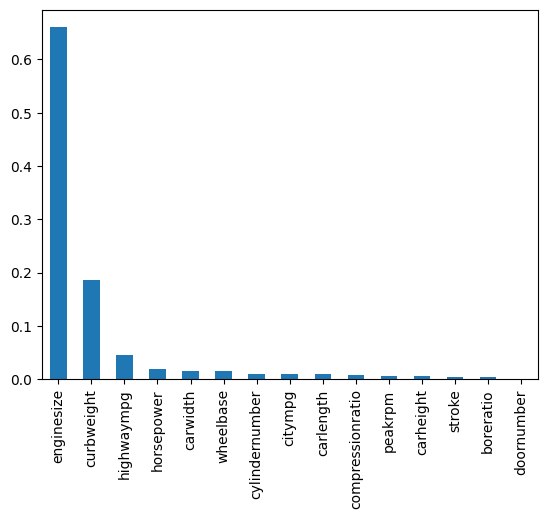

In [157]:
fimp.nlargest(17).plot(kind='bar')

In [158]:
finaldf=pd.concat([dfcategories,dfnum],axis=1)
finaldf.head()

,carbody,enginetype,fuelsystem,country,fueltype_gas,aspiration_turbo,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,1,1,1,0,0,1,0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,1,1,1,1,0,0,1,0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,2,2,1,1,1,0,0,1,0,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,3,3,1,2,1,0,1,0,0,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,3,3,1,2,1,0,0,0,0,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


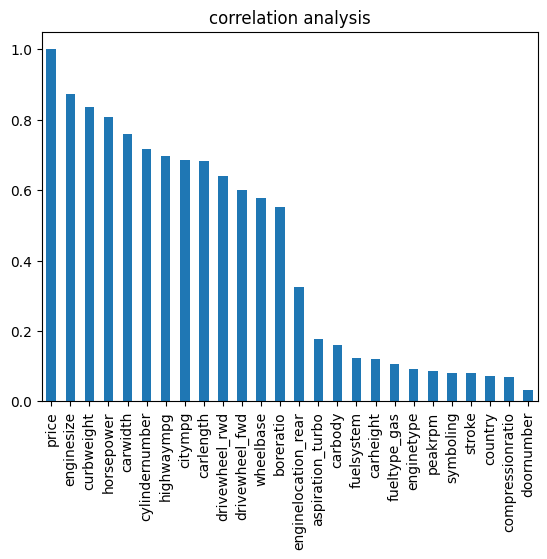

In [159]:
cor=finaldf.corr()
corrt=cor['price'].abs().sort_values(ascending=False)
corrt.plot(kind='bar')
plt.title('correlation analysis')
plt.show()

In [160]:
finaldf.drop(['symboling','carheight','compressionratio'],axis=1,inplace=True)
finaldf.columns

Index(['carbody', 'enginetype', 'fuelsystem', 'country', 'fueltype_gas',
       'aspiration_turbo', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [161]:
y=finaldf['price']
x=finaldf.drop('price',axis=1)

In [174]:
x.shape

(205, 22)

splitting dataset into training, test 

In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

RandomForestRegressor Model

In [164]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,max_depth=15,min_samples_leaf=2,min_samples_split=5)
rf.fit(x_train,y_train)


RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5)

In [165]:
rfscore=rf.score(x_test,y_test)
rpred=rf.predict(x_test)
print(f'Random Forest Regression \naccuracy :{rfscore*100}')

Random Forest Regression 
accuracy :96.88161597007385


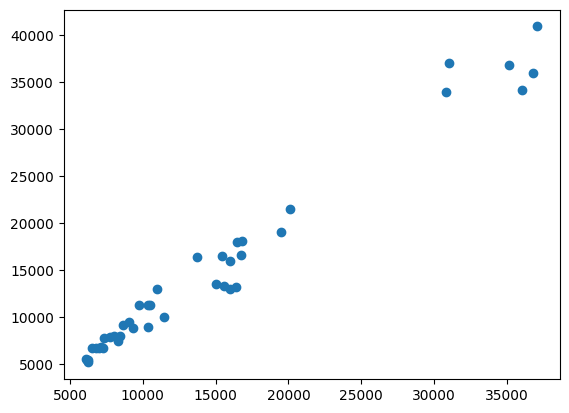

In [166]:
plt.scatter(rpred,y_test)

AdaBoost Regressor model

In [167]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=100,random_state=0)
ada.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [168]:
adascore=ada.score(x_test,y_test)
adapred=ada.predict(x_test)
print(f'AdaBoostRegressor \n accuracy :{adascore*100}')

AdaBoostRegressor 
 accuracy :96.59455585166589


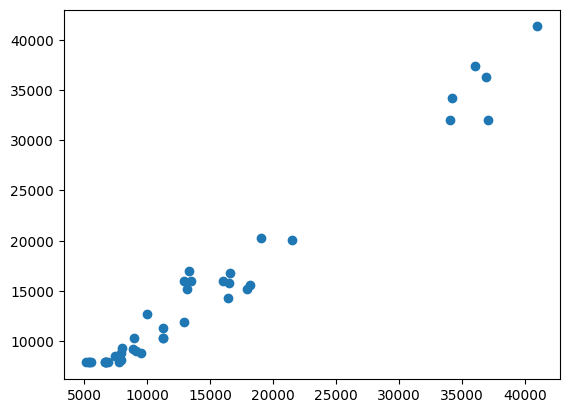

In [169]:
plt.scatter(y_test,adapred)

HistGradientBoosting Regressor model

In [170]:
from sklearn.ensemble import HistGradientBoostingRegressor
hgbr=HistGradientBoostingRegressor(max_depth=15,l2_regularization=2)
hgbr.fit(x_train,y_train)

HistGradientBoostingRegressor(l2_regularization=2, max_depth=15)

In [171]:
hgbrscore=hgbr.score(x_test,y_test)
print(f'HistGradientBoostingRegressor\n accuracy :{hgbrscore*100}')

HistGradientBoostingRegressor
 accuracy :93.30757288882182


randomforest,adaboost have better accuracy of 96%

In [173]:
f=open('car_price_prediction_RandomForest.pkl','wb')
pickle.dump(rf,f)